<a href="https://colab.research.google.com/github/zabrinalang/demorepository/blob/main/notebooks2025/section04_DataQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/notebooks2025/section04_DataQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook go through steps to generate ambient contamination metric plots to check the quality of a scRNA-seq dataset

## Preparation Steps
### 1. Install required packages

In [ ]:
! pip install matplotlib==3.7.5
#==3.6.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install scanpy==1.10.1
! pip install pandas==2.2.2
! pip install numpy==1.26.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 31.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 7.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=20118a7afe4ea2595a5790c7eed02f1c7d1f2601d6ccc

In [ ]:
!pip install setuptools==65.5.0 wheel==0.38.4

In [ ]:
!pip install dropkick==1.2.8

In [ ]:
!pip install POT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.3/682.3 KB 32.0 MB/s eta 0:00:00


clone the github that has codes for ambient contamination analysis

In [ ]:
! git clone https://github.com/Ken-Lau-Lab/AmbiQuant.git

Cloning into 'AmbiQuant'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 97 (delta 47), reused 72 (delta 27), pack-reused 0 (from 0)
Unpacking objects: 100% (97/97), 3.03 MiB | 7.60 MiB/s, done.


### 2. Import packages

In [ ]:
import scanpy as sc

In [ ]:
import sys
import numpy as np
import pandas as pd

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import dropkick as dk

At this point, if dropkick cannot be imported, uncomment the next cell and run it. Then, <font color='red'>restart runtime</font> after installing. Run all the <font color='#b225f6'>import</font> cells after restart the runtime

In [ ]:
#! pip install matplotlib

Found existing installation: matplotlib 3.6.2
Uninstalling matplotlib-3.6.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.2-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.6.2


In [ ]:
sys.path.append("./AmbiQuant/")
sys.path.append("./AmbiQuant/QCPipe_dir/")
#add the path of the contamination python files to the notebook's search path so that they can be imported

In [ ]:
import quality_control_function as qc_functions
import plot_quality_score as qc_plts
import QCPipe

### 3. Download data files

In [ ]:
! mkdir 7017_YX_1
# this line created a folder '7017_YX_1' in the current working directory

In [ ]:
! curl -O -J -L https://www.dropbox.com/sh/af9ih0g50bveqoy/AABg1o8xOzlIXTsinxUQKzAra?dl=0
# download data from the url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   140  100   140    0     0    769      0 --:--:-- --:--:-- --:--:--   773
100    17  100    17    0     0     17      0  0:00:01 --:--:--  0:00:01    22
100 53.3M  100 53.3M    0     0  22.5M      0  0:00:02  0:00:02 --:--:-- 46.4M


In [ ]:
! unzip cmraw_sparse.zip -d 7017_YX_1
#unzipping the folder to get separated files

Archive:  cmraw_sparse.zip
mapname:  conversion of  failed
 extracting: 7017_YX_1/7017-YX-1_S1_L005_counts.mtx  
 extracting: 7017_YX_1/7017-YX-1_S1_L005_barcodes.txt  
 extracting: 7017_YX_1/7017-YX-1_S1_L005_features.txt  


note the 3 enssential files for RNA-seq data: the count matrix, a list of barcodes and a list of gene names (feature)

## Generating metric plots
### 1. Read data into an anndata object and cut to 10,000 barcodes

Calculating QC Metrics
Inflection point at [ 4341 11047 17754] for [0, 15, 30] percentiles of greatest secant distances
the original dataset has 49053 cells. Cut to 10000 cells


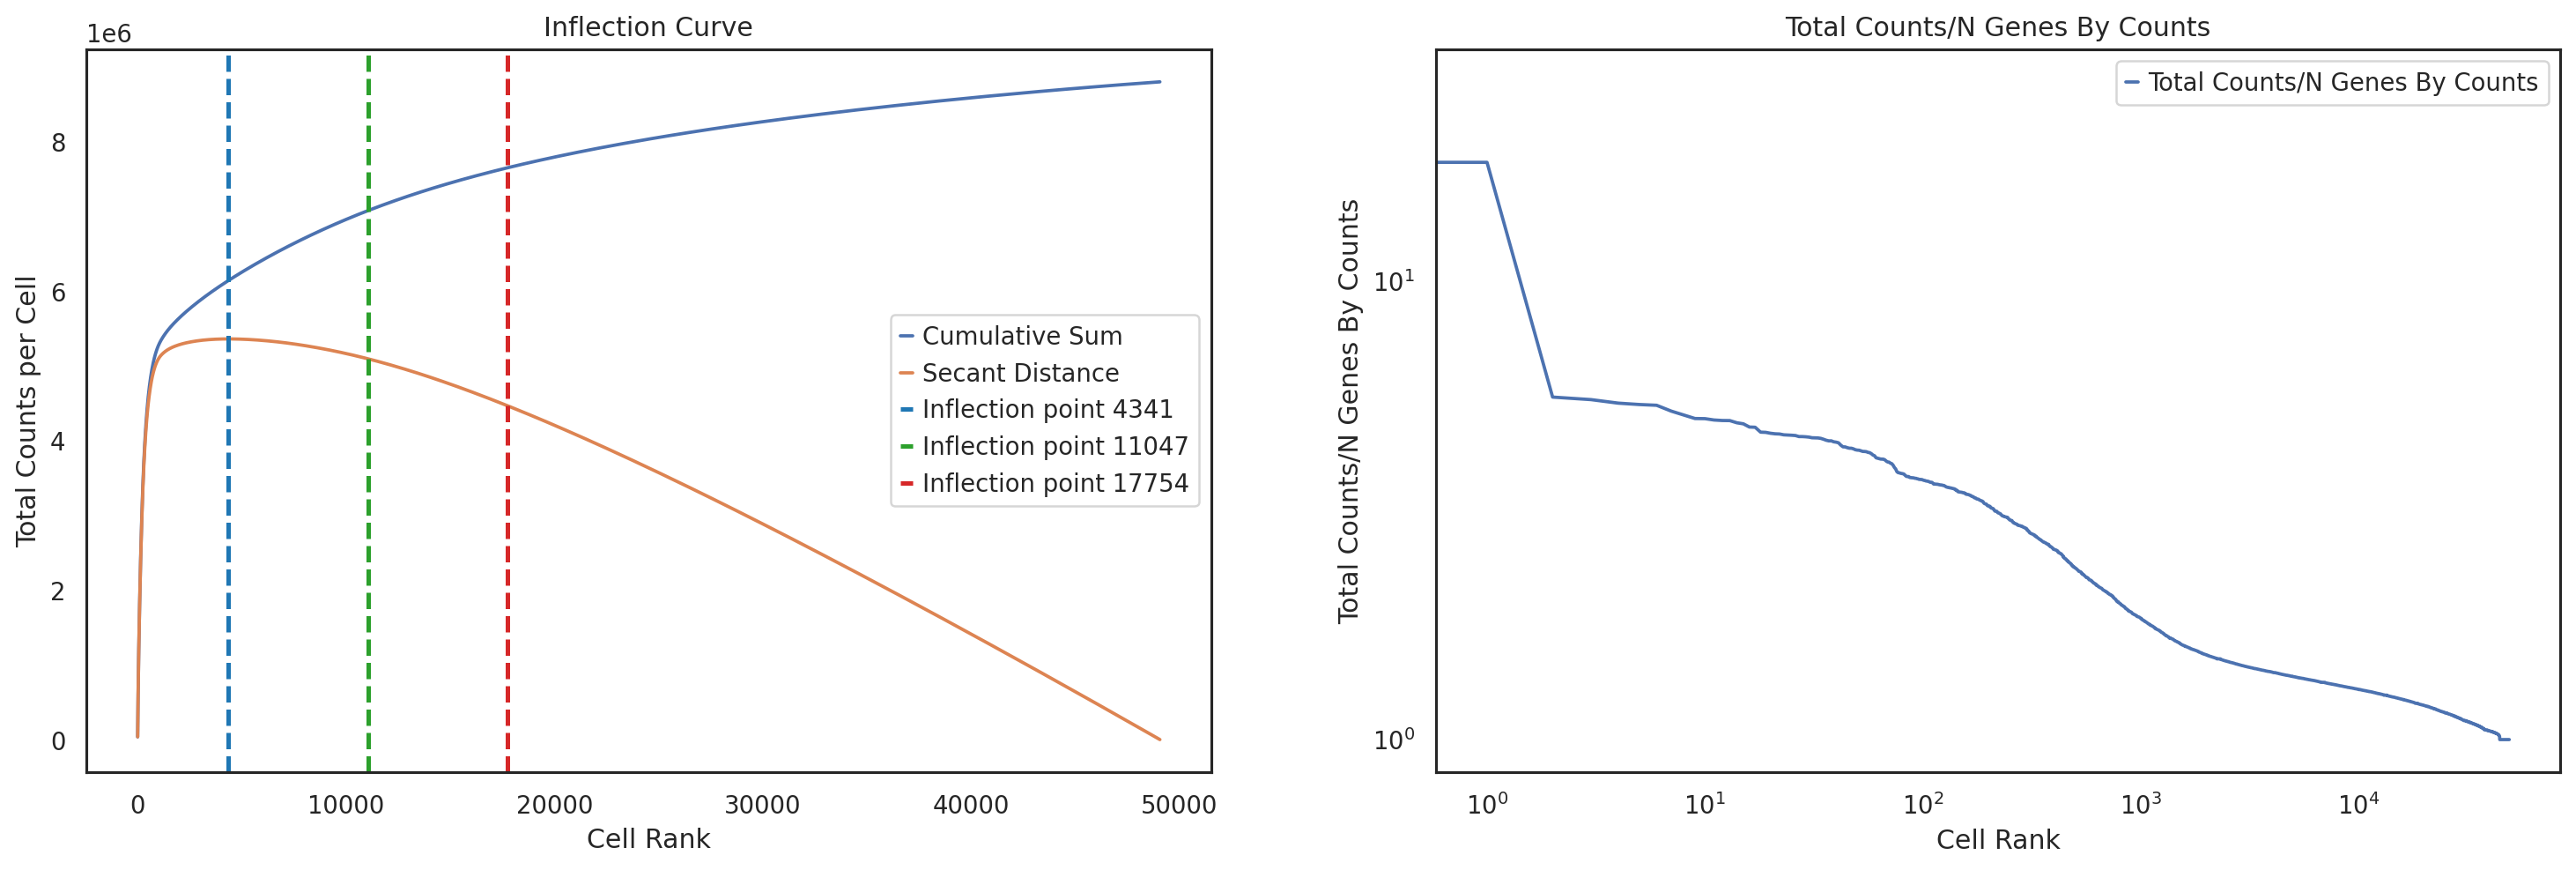

In [ ]:
dat = qc_functions.cut_off_from_dropset( "./7017_YX_1", gene_file_delim="\t", barcode_file_delim="\t", mito_tag="mt-"  )
# the first parameter is the path name where the data files are stored
# the second and third param are specifiying delimiter used in the files (csv needs to use ',', tsv needs to use '\t' ... )
# more parameter specification can be found in the documentation


As I mentioned earlier, note there were 50,000 cells in the raw file initially, but most of them are empty droplets as you can see the plateau. Conventionally we keep 10,000 cells to proceed.

### 2. Generate the metric plots

./AmbiQuant/plot_quality_score.py:270: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  sample_dat.var["pct_dropout_by_counts"] = np.array(


Top 0 ambient genes have dropout rates between nan and nan percent:
	[]
no ambient genes to be plotted
Overall score: 0.3103708168159143


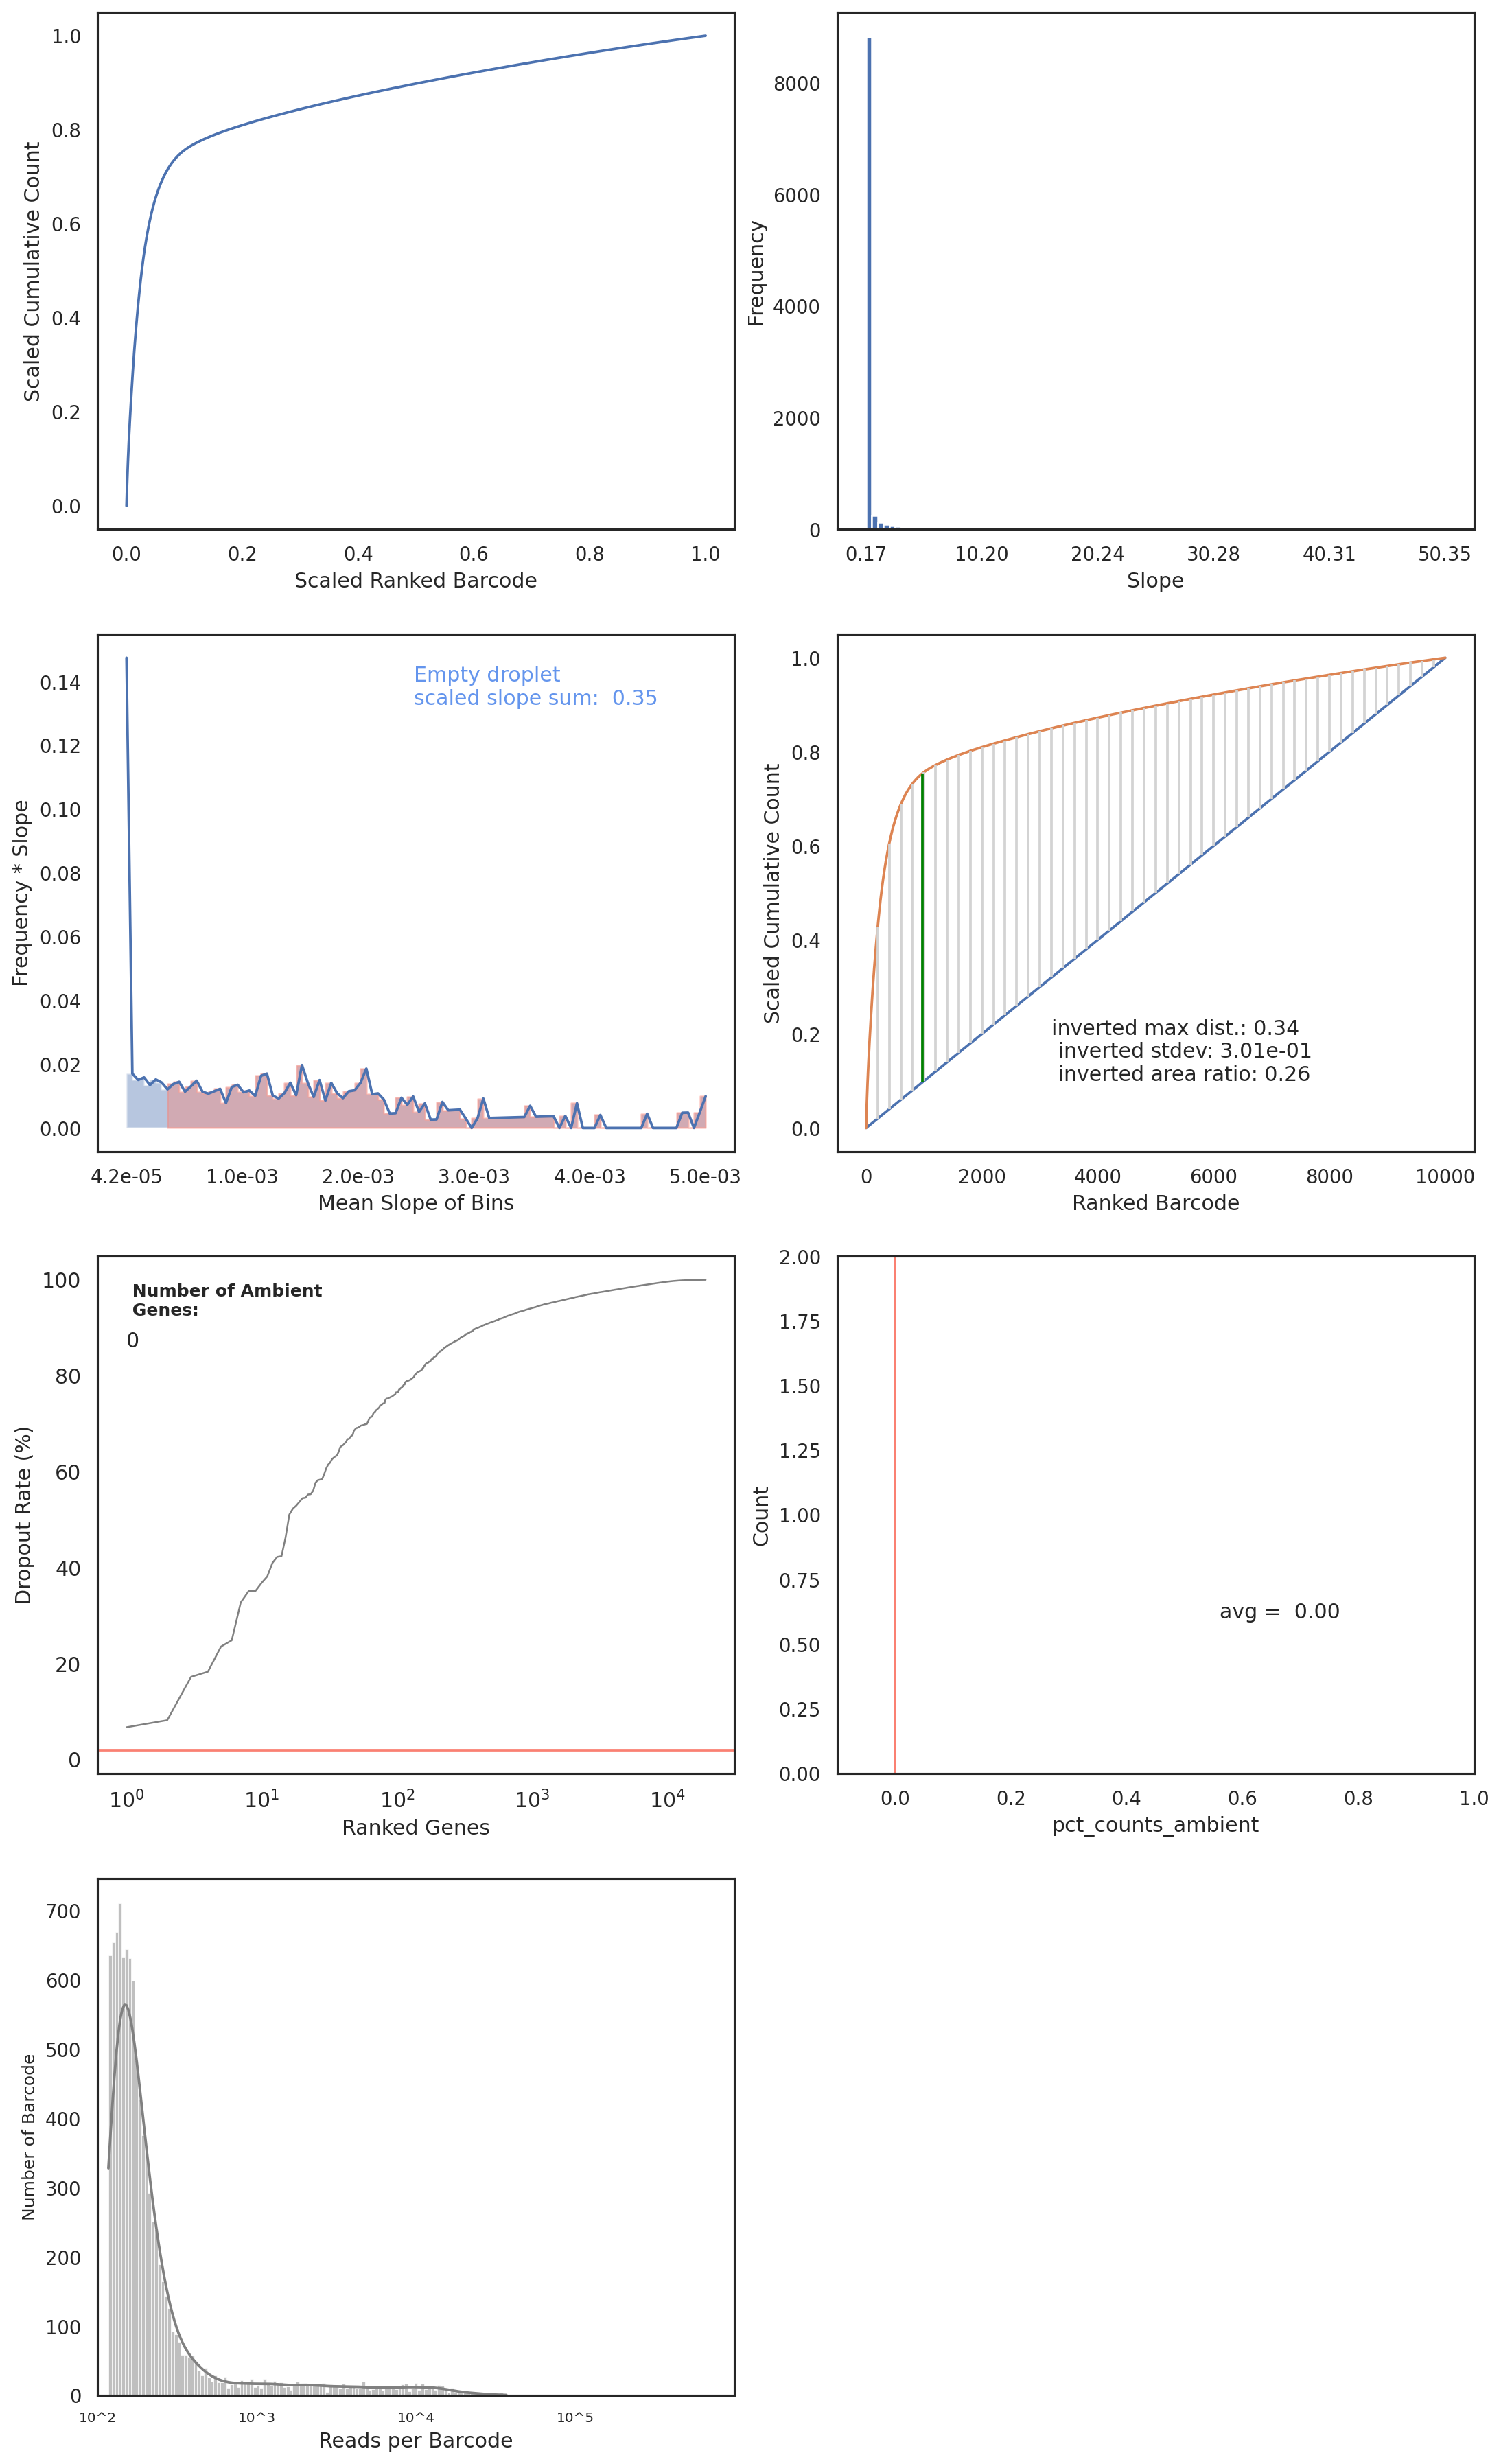

In [ ]:
ret = qc_plts.formatted_figures_inverted(dat, ncols = 2, )

In [ ]:
dat
#check information in this anndata object

AnnData object with n_obs × n_vars = 10000 × 19171
    obs: 'total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial'
    var: 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mito', 'ambient'
    uns: 'Order', 'inflection1', 'inflection_fold'
    layers: 'raw_counts'

/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


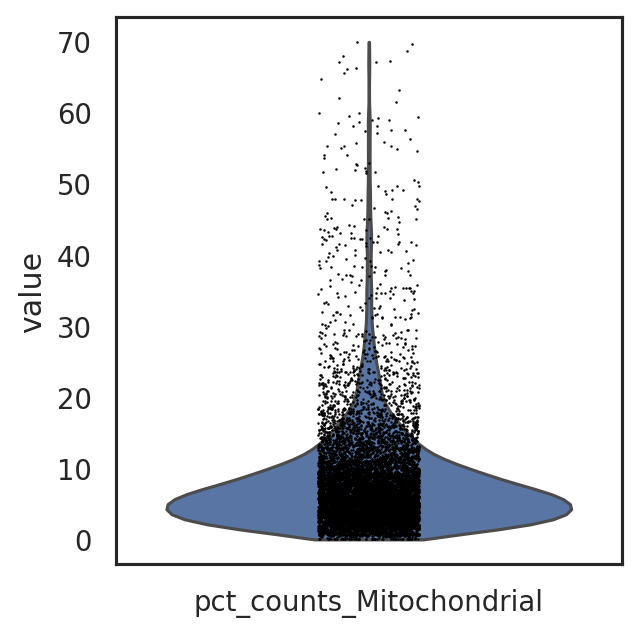

In [ ]:
 sc.pl.violin(dat, "pct_counts_Mitochondrial")
 # Visualize one of the standard qc metrics with scanpy pl module functions

<Axes: >

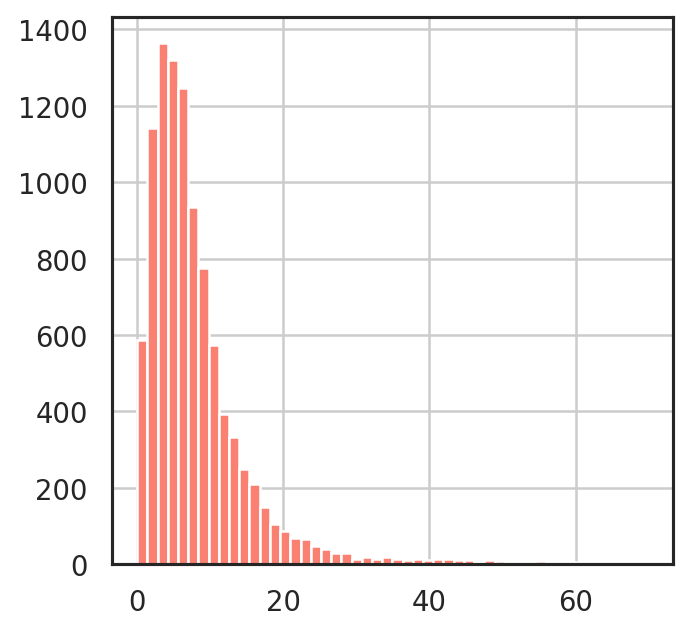

In [ ]:
dat.obs["pct_counts_Mitochondrial"].hist(bins = 50, color ='salmon')
# can also use matplotlib
# this hist() is a method called on the dataframe 'dat.obs["pct_counts_Mitochondrial"]', which is a subset of dat.obs dataframe

<Axes: >

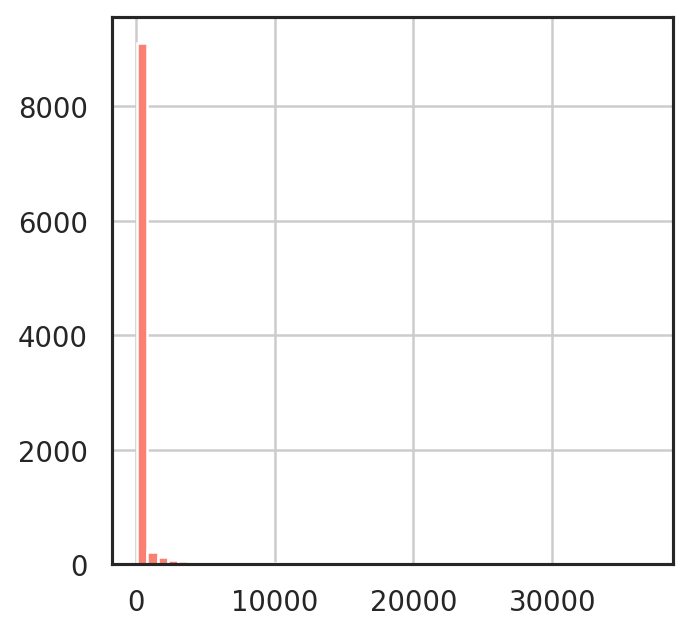

In [ ]:
dat.obs["total_counts"].hist(bins = 50, color ='salmon')

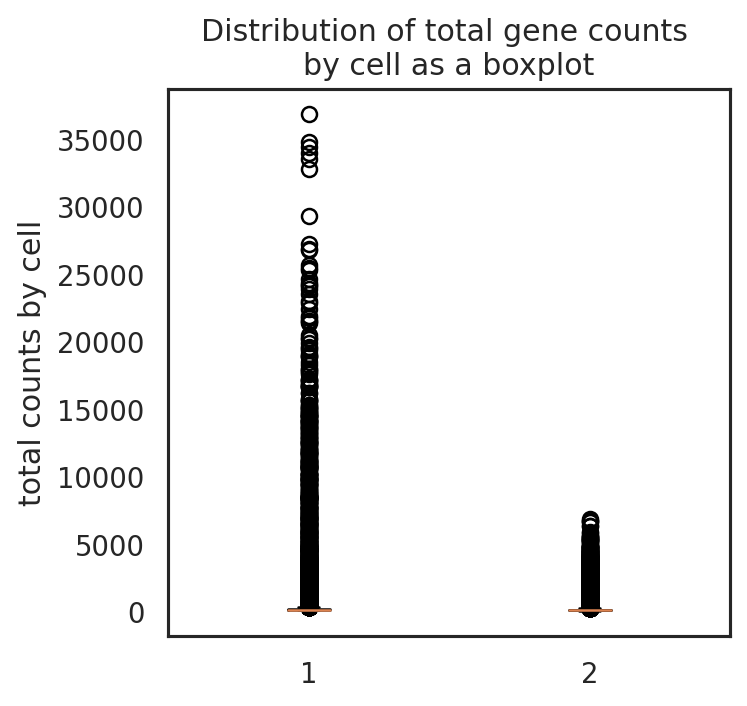

In [ ]:
p = plt.boxplot( dat.obs[ ['total_counts', 'n_genes_by_counts']]  )
plt.ylabel( "total counts by cell")
plt.title( "Distribution of total gene counts \nby cell as a boxplot")
plt.show()

In [ ]:
dat.obs[['total_counts', 'n_genes_by_counts' ]].describe()

,total_counts,n_genes_by_counts
count,10000.000000,10000.000000
mean,695.608887,301.487900
std,2382.853760,640.465991
min,117.000000,36.000000
25%,140.000000,109.000000
50%,169.000000,129.000000
75%,234.000000,171.000000
max,36886.000000,6854.000000


## Basic QC steps from scanpy and show the stat summary

In [ ]:
dat2 = dat.copy()

In [ ]:
sc.pp.filter_cells(dat2, min_genes=200)
sc.pp.filter_genes(dat2, min_cells=3)

In [ ]:
dat2 = dat2[dat2.obs.n_genes_by_counts < 2500, :] # remove potential doublets ( droplets that captures 2 (>1) cells)
dat2 = dat2[dat2.obs.pct_counts_Mitochondrial < 5, :] #remove cells with high mitochondrial percentage

In [ ]:
dat2.n_obs # check how many cells left

807

In [ ]:
dat2.obs[['total_counts', 'n_genes_by_counts' ]].describe()

,total_counts,n_genes_by_counts
count,807.000000,807.000000
mean,1752.713745,809.241636
std,1914.275757,647.664786
min,238.000000,200.000000
25%,371.000000,265.000000
50%,898.000000,560.000000
75%,2530.000000,1248.500000
max,10206.000000,2497.000000


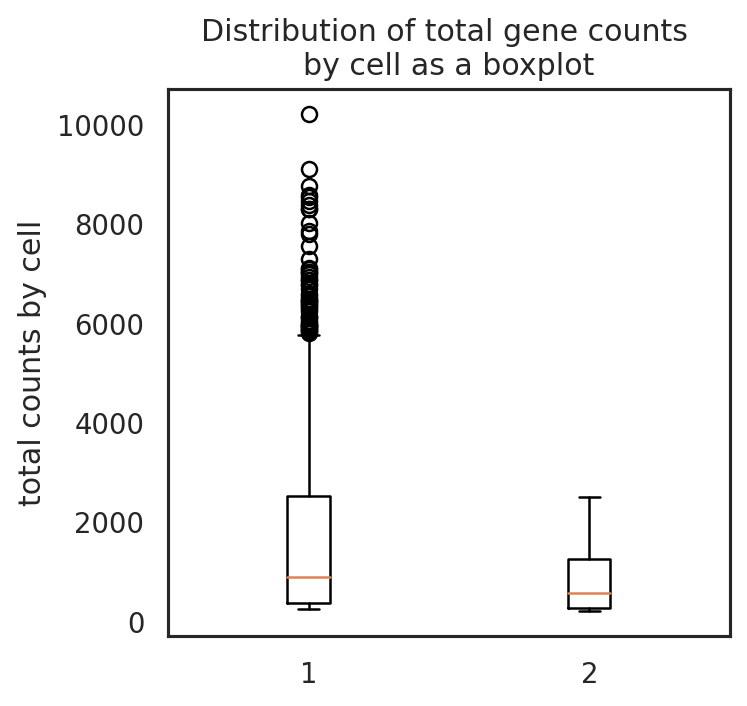

In [ ]:
p = plt.boxplot( dat2.obs[ ['total_counts', 'n_genes_by_counts']]  )
plt.ylabel( "total counts by cell")
plt.title( "Distribution of total gene counts \nby cell as a boxplot")
plt.show()

## try initial filter with dropkick and show the stat summary

Ignoring 6 barcodes with less than 50 genes detected
Ignoring 245 genes with zero total counts
Top 10 ambient genes have dropout rates between 6.734 and 36.832 percent:
	['mt-Cytb', 'Mptx1', 'mt-Nd4', 'Muc2', 'Clca1', 'mt-Nd1', 'Sprr2a2', 'mt-Co1', 'Car1', 'Trim30a']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 7343 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   16.9s finished


Chosen lambda value:
	[0.08938134]
Assigning scores and labels
Done!

Calculating QC Metrics
Inflection point at [ 970 2324 3678] for [0, 15, 30] percentiles of greatest secant distances


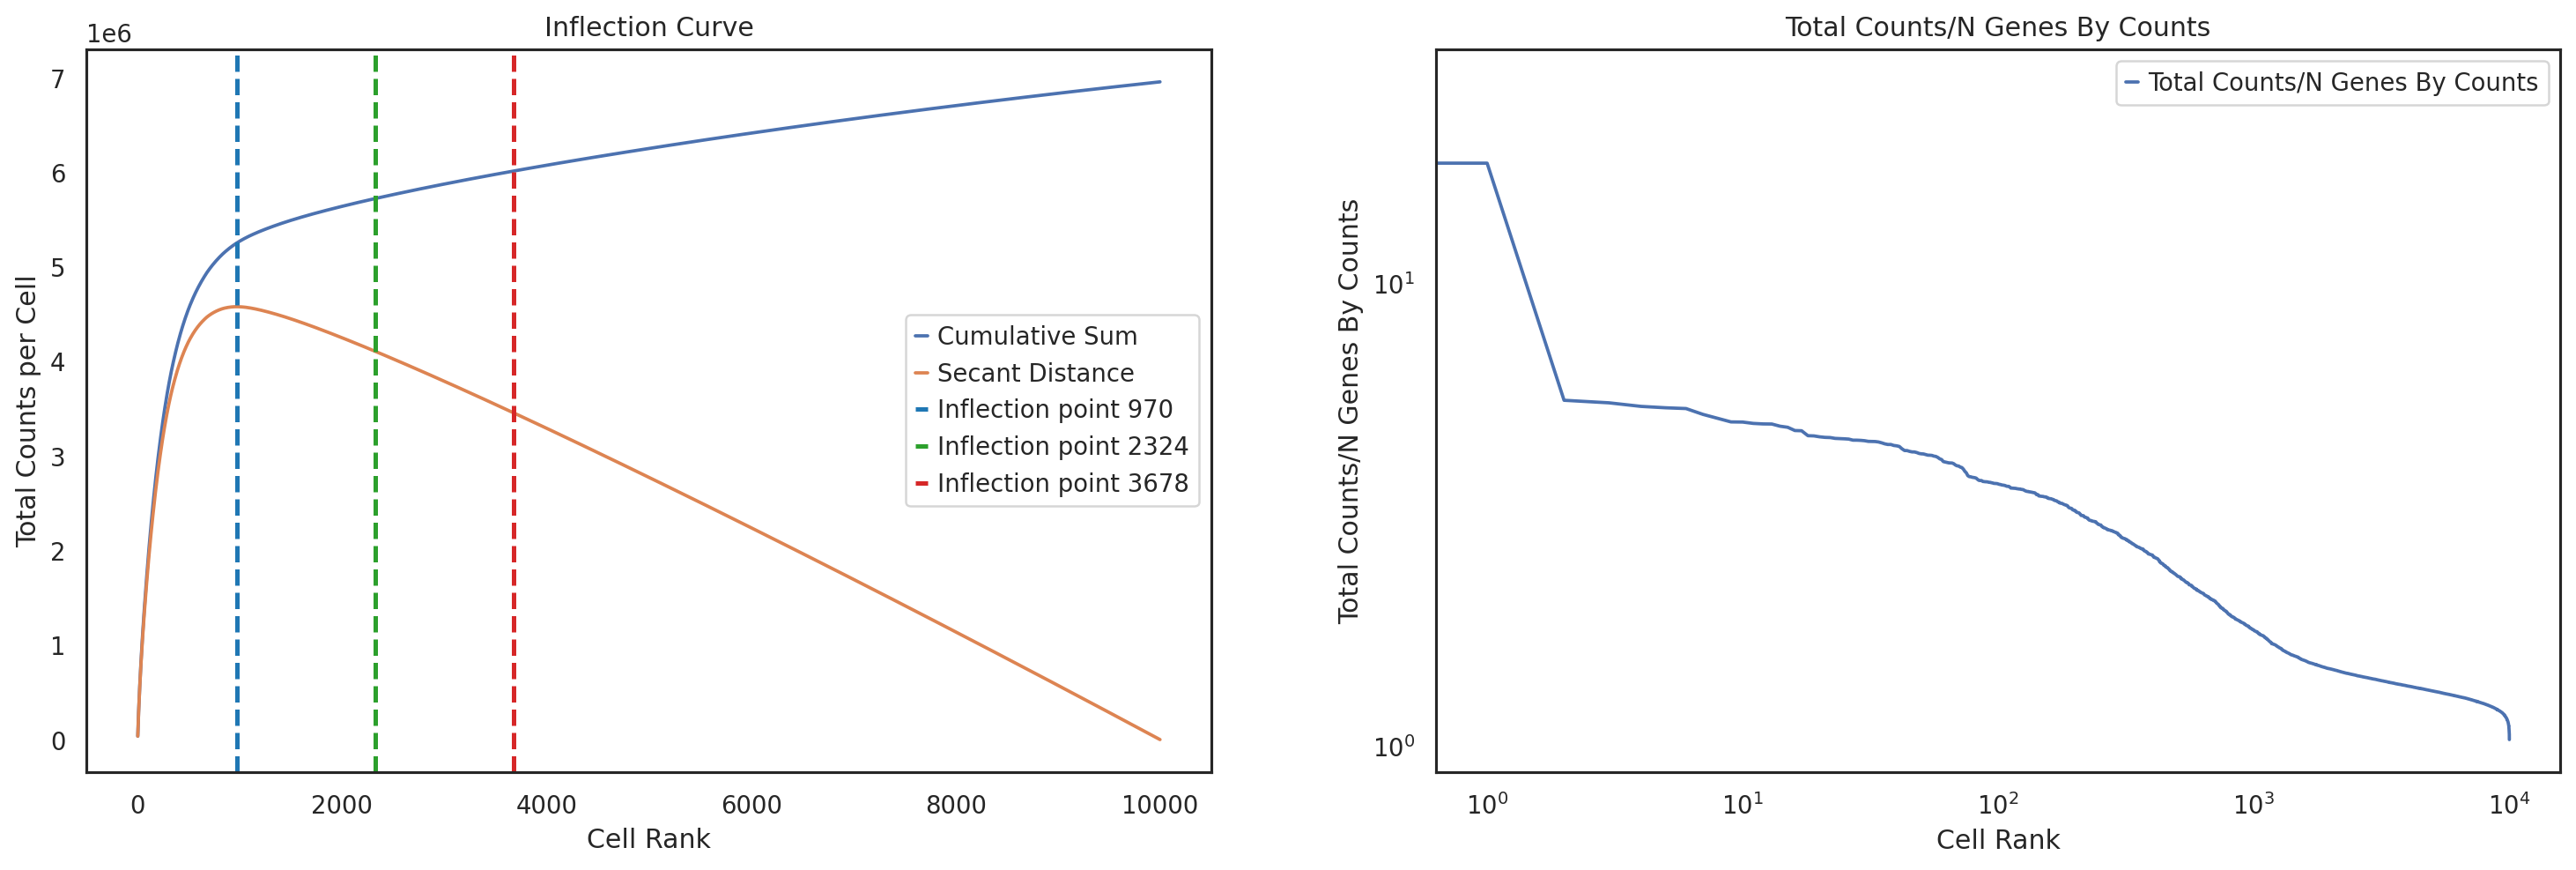

In [ ]:
dk.dropkick(dat)
dat.obs['dropkick_label']= dat.obs['dropkick_label'].astype(str)
inf = QCPipe.qc.find_inflection(dat)
sc.pp.filter_cells(dat,min_counts=dat[inf[0]].obs.total_counts[0])
dat.raw = dat.copy()

In [ ]:
dat = dat[dat.obs['dropkick_label'] == 'True'] # keep the cells with True dropkick label

In [ ]:
dat.n_obs # check how many cells left

419

In [ ]:
dat.obs[['total_counts', 'n_genes_by_counts' ]].describe()

,total_counts,n_genes_by_counts
count,419.000000,419.000000
mean,7146.071777,2326.978520
std,6392.797363,1390.802896
min,697.000000,379.000000
25%,2232.500000,1132.500000
50%,4987.000000,2046.000000
75%,10631.000000,3296.500000
max,36886.000000,6854.000000


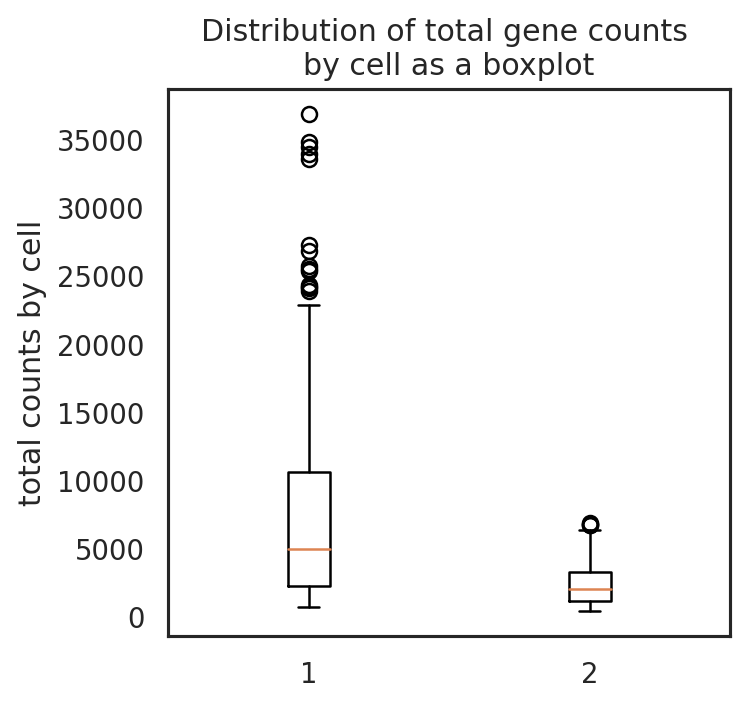

In [ ]:
p = plt.boxplot( dat.obs[ ['total_counts', 'n_genes_by_counts']]  )
plt.ylabel( "total counts by cell")
plt.title( "Distribution of total gene counts \nby cell as a boxplot")
plt.show()

## Working with Filtered Data

In [ ]:
#%cd /content/ #change back to the home directory

! curl -O -J -L https://www.dropbox.com/s/tvn3s1413julpjs/YX1_7017_cells.h5ad?dl=0
#download the filtered dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    65    0    65    0     0    289      0 --:--:-- --:--:-- --:--:--   290
100   318  100   318    0     0    366      0 --:--:-- --:--:-- --:--:--     0
100   491    0   491    0     0    256      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
curl: (23) Failed writing header


In [ ]:
filtered_dat = sc.read("./YX1_7017_cells.h5ad")

In [ ]:
filtered_dat

AnnData object with n_obs × n_vars = 783 × 18894
    obs: 'total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'n_genes_by_counts_zscore', 'relative_transcript_diversity_threshold', 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'n_counts', 'leiden', 'Cell_Selection'
    var: 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'dropkick_coef', 'mean', 'std'
    uns: 'Order', 'dropkick_args', 'dropkick_label_colors', 'dropkick_thresholds', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
standard_qc_metrics =  ['total_counts', 'n_genes_by_counts',"pct_counts_in_top_200_genes", 'pct_counts_Mitochondrial', "dropkick_score" , 'leiden']

/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


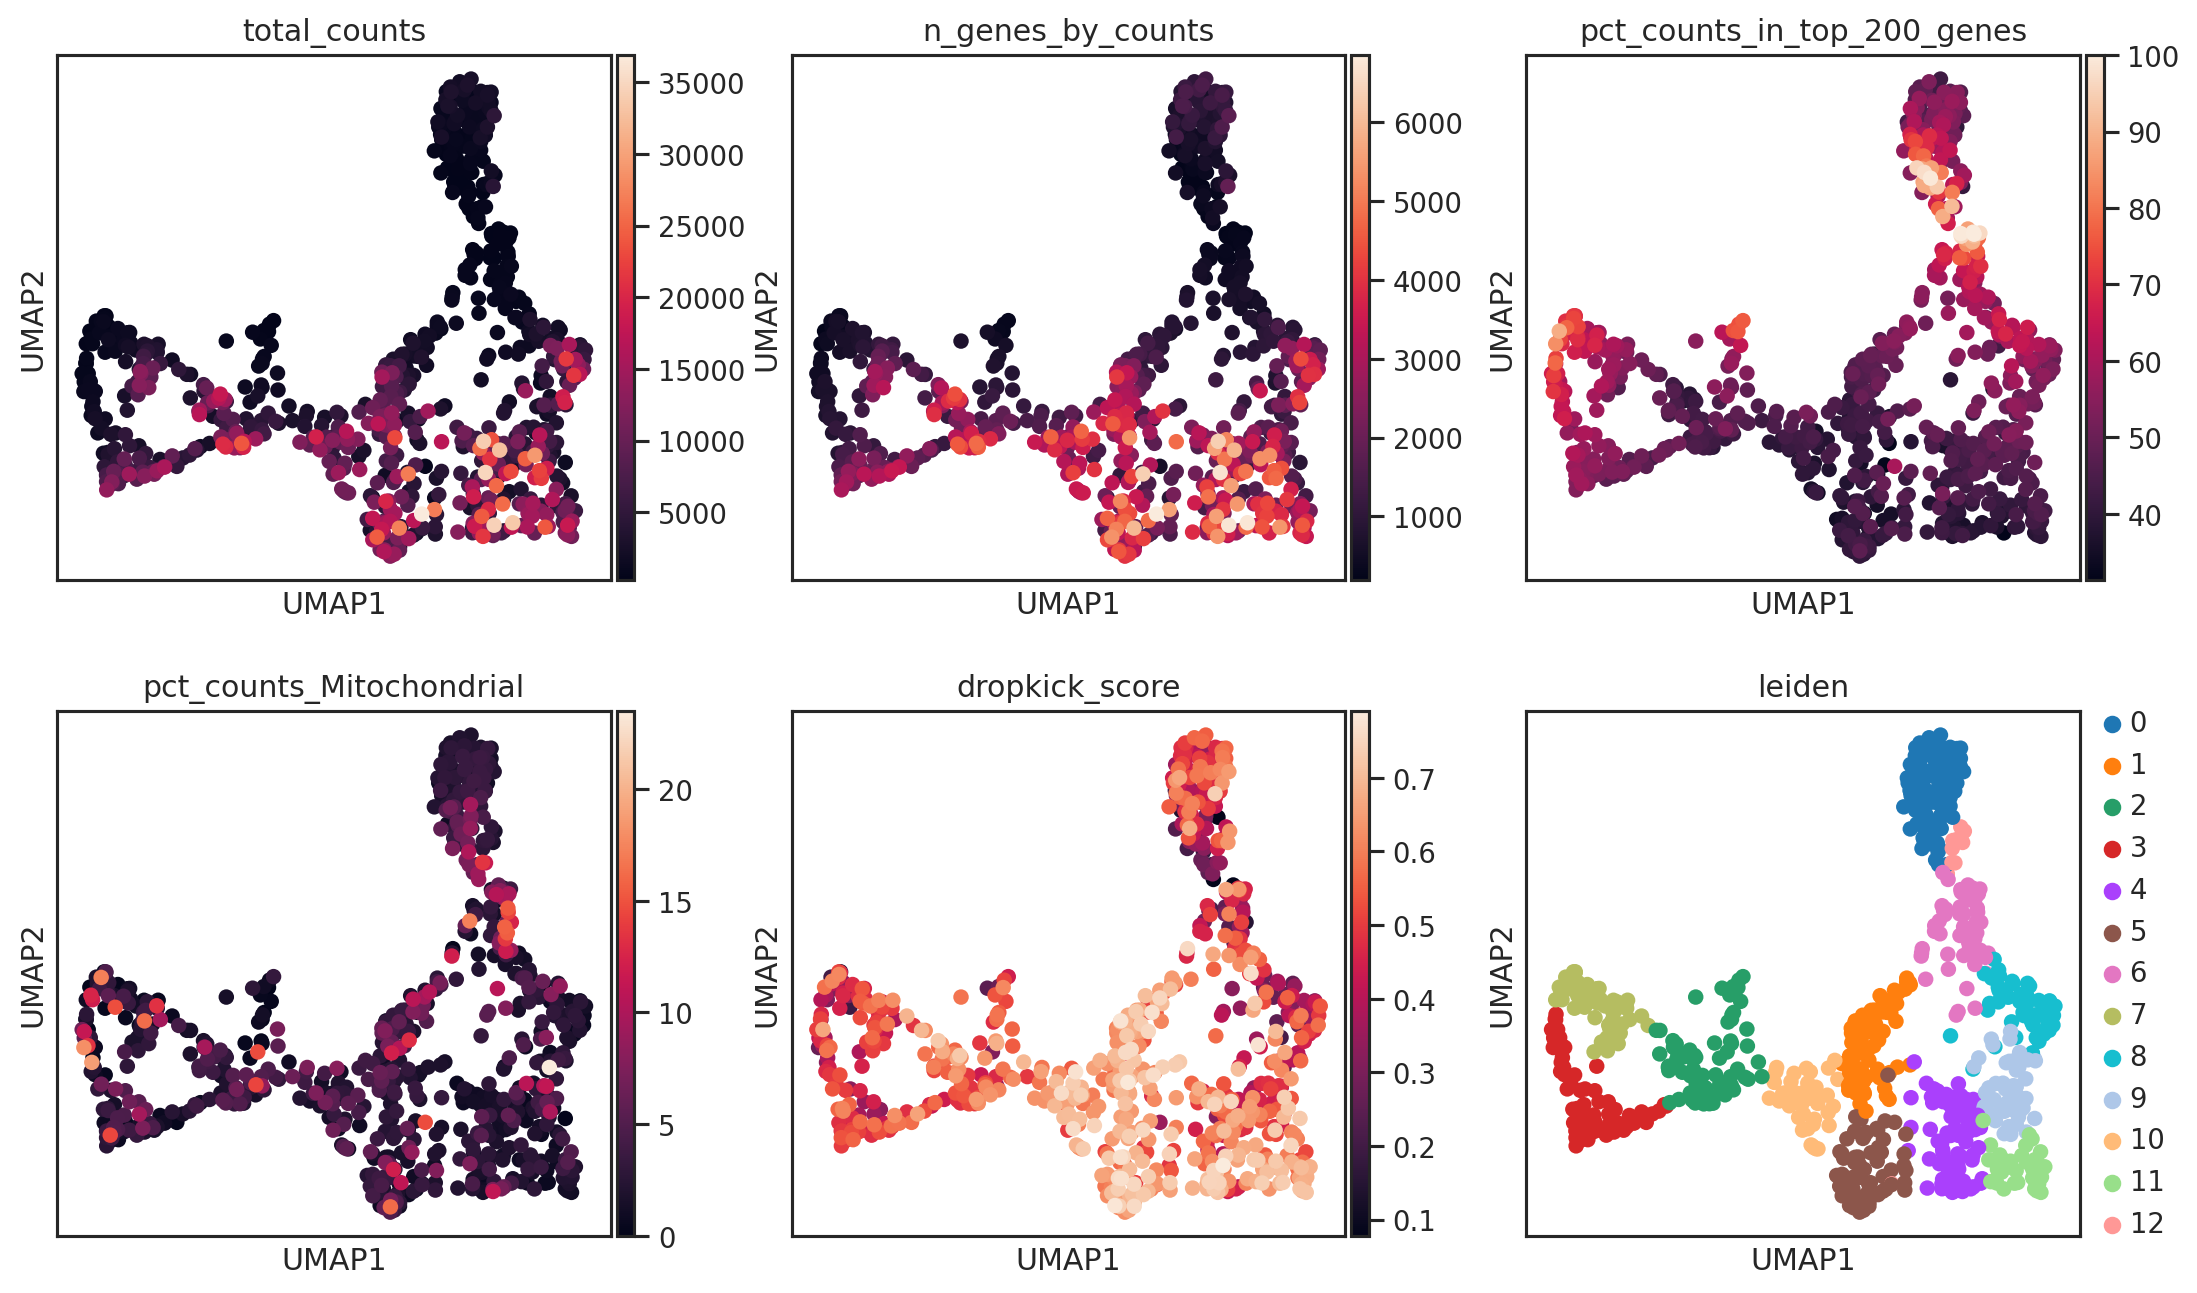

In [ ]:
sc.pl.umap(filtered_dat, color = standard_qc_metrics, ncols=3)

In [ ]:
ne_markers = ['Cd8a',  'Cd4', 'Jchain', 'Col1a1'] # Non-epithelial cell markers

In [ ]:
markers = ['Guca2a',  'Lgr5', 'Mki67',  'Muc2', 'Chga', 'Dclk1'] # epithelial cell type markers

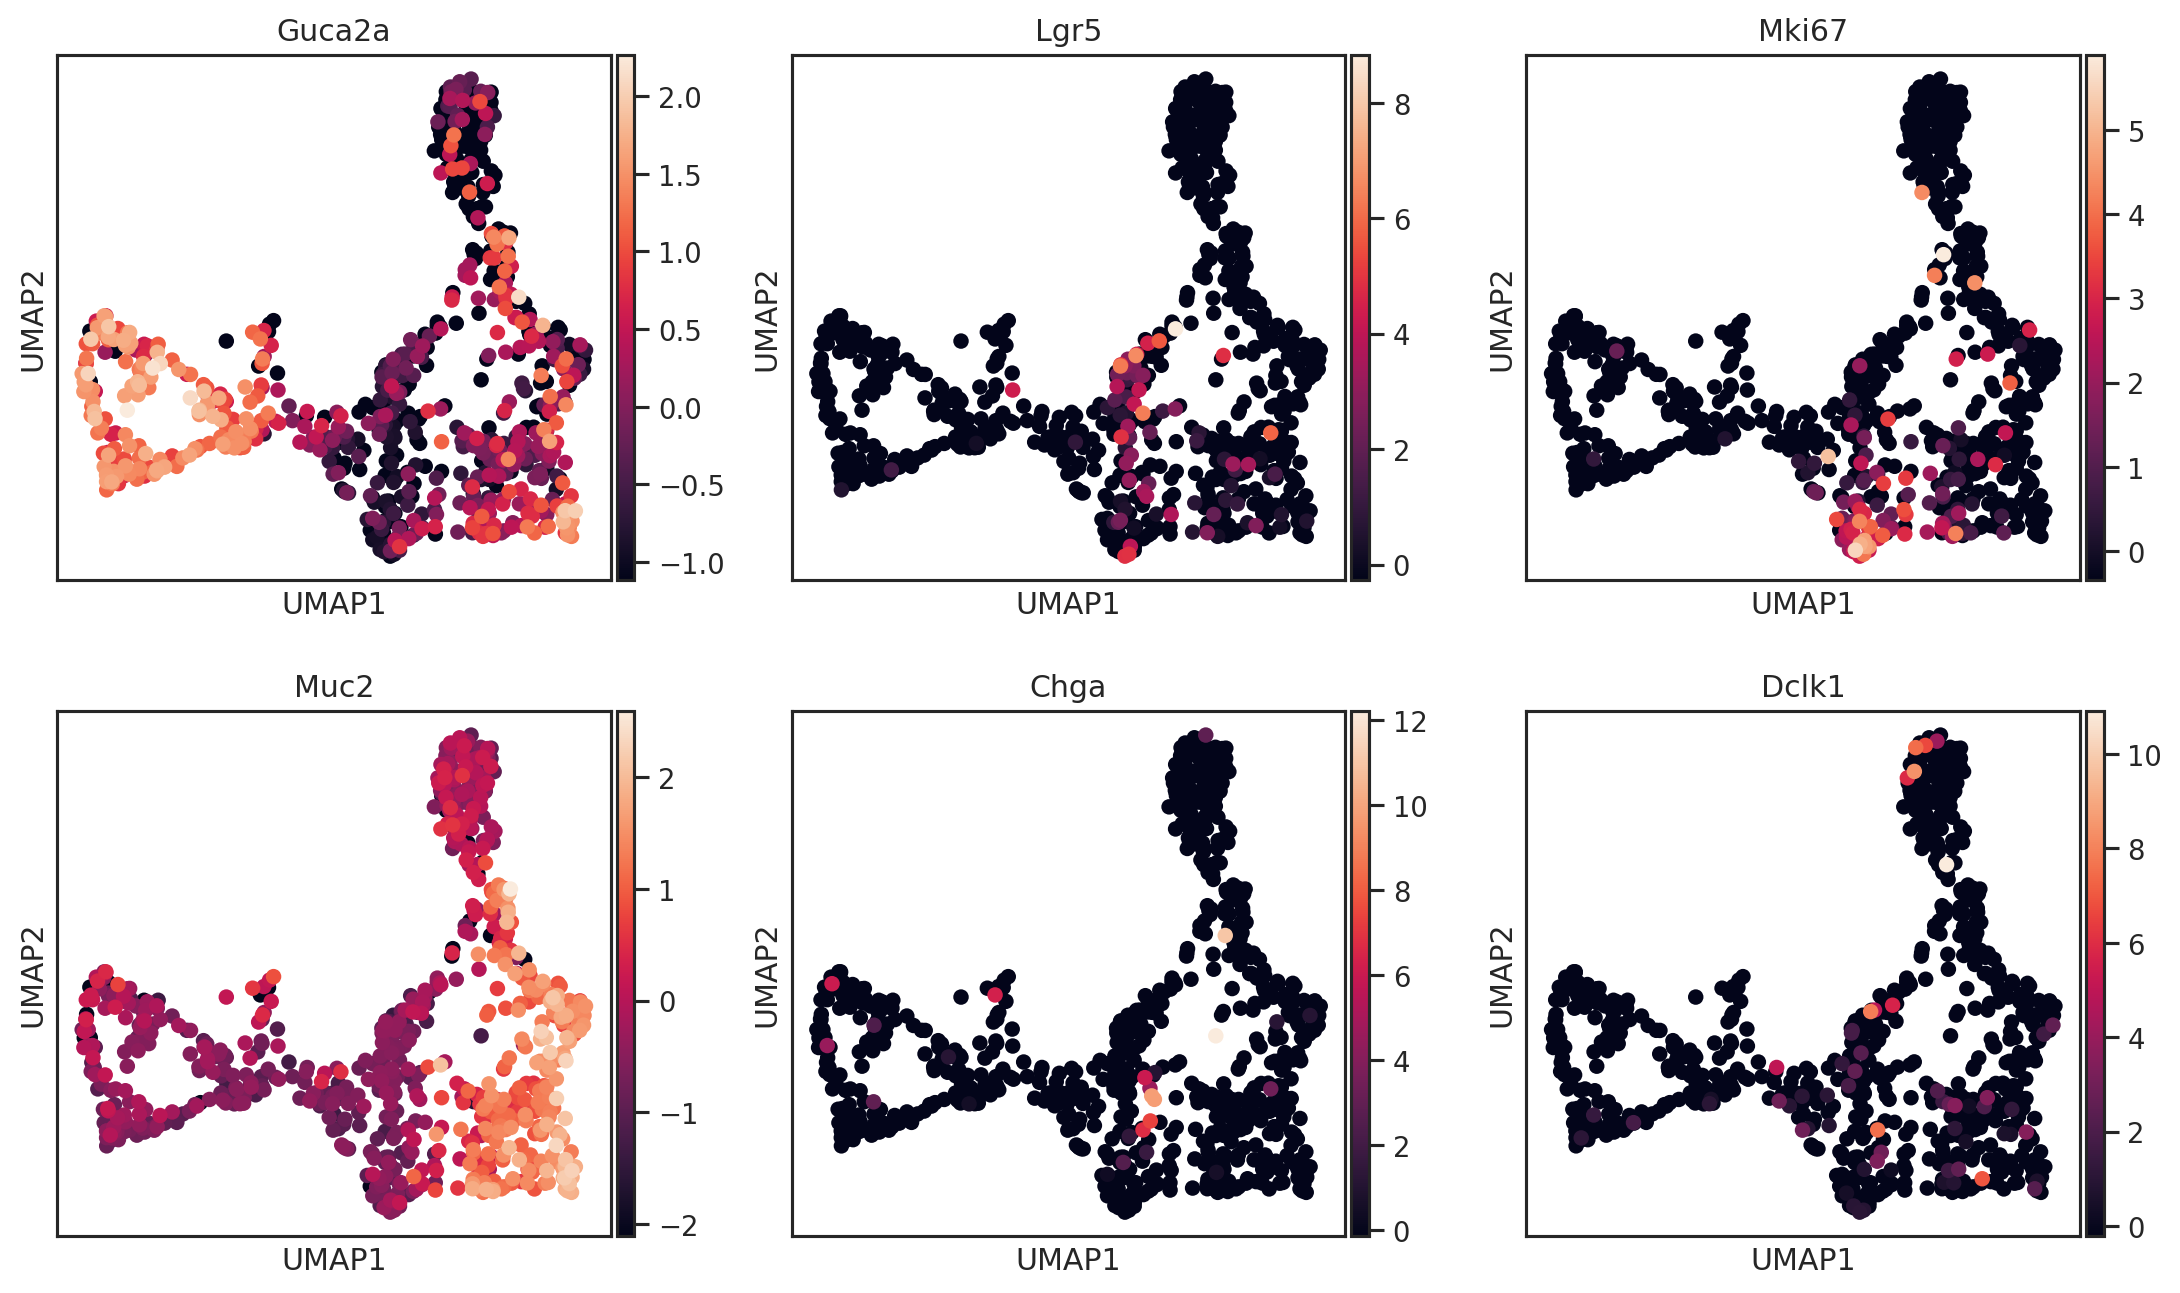

In [ ]:
sc.pl.umap(filtered_dat, color = markers, ncols=3, use_raw= False)

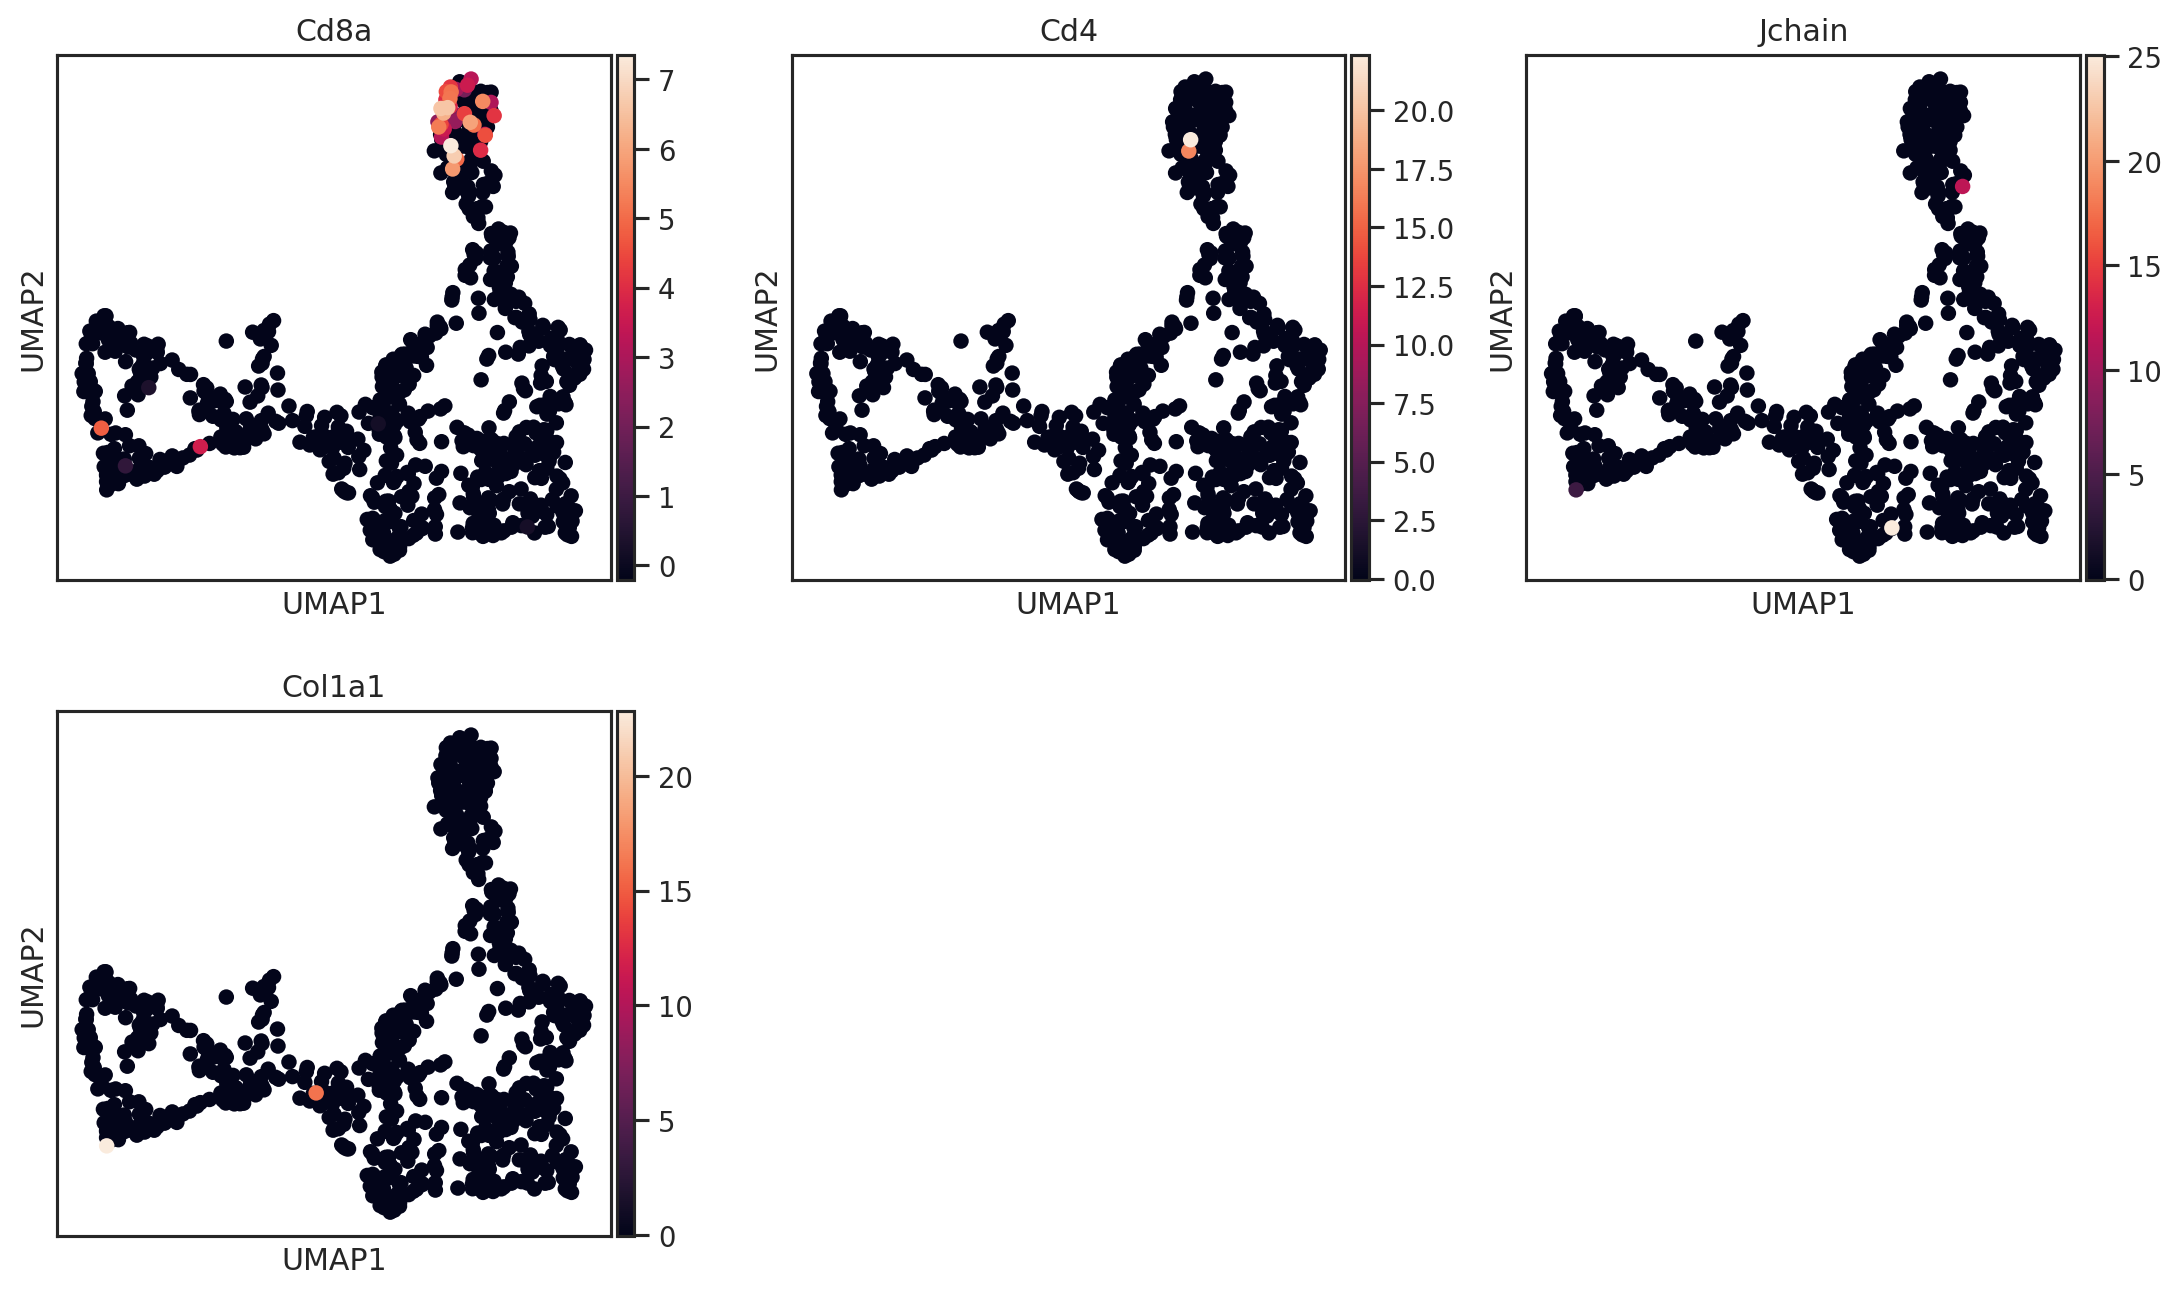

In [ ]:
sc.pl.umap(filtered_dat, color = ne_markers, ncols=3, use_raw= False)